# Probability Distributions

In [1]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
xs = np.linspace(-5, 10, 2000)
ks = np.arange(50)

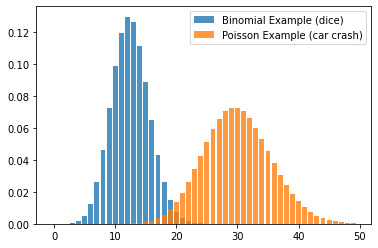

In [3]:
# discrete pmfs
pmf_binom = ss.binom.pmf(ks, 50, 0.25)
pmf_poisson = ss.poisson.pmf(ks, 30)

plt.bar(ks, pmf_binom, label='Binomial Example (dice)', alpha=0.8);
plt.bar(ks, pmf_poisson, label='Poisson Example (car crash)', alpha=0.8);
plt.legend();

In [4]:
print(ss.binom.pmf(10, 50, 0.25))
print(ss.poisson.pmf(50, 30))

0.09851840993941753
0.00022087848072126846


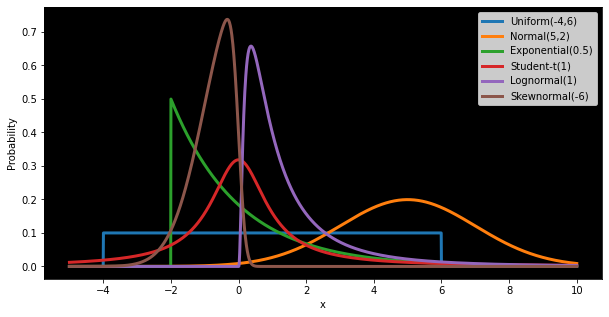

In [5]:
# continuous pdfs
pdf_uniform = ss.uniform.pdf(xs, -4, 10)
pdf_normal = ss.norm.pdf(xs, 5, 2)
pdf_exp = ss.expon.pdf(xs, -2, 2)
pdf_stut = ss.t.pdf(xs, 1)
pdf_logn = ss.lognorm.pdf(xs, 1)
pdf_skewn = ss.skewnorm.pdf(xs, -6)

plt.figure(figsize=(10,5))
ax = plt.gca()
ax.set_facecolor('k')
plt.plot(xs, pdf_uniform, label='Uniform(-4,6)', lw=3);
plt.plot(xs, pdf_normal, label='Normal(5,2)', lw=3);
plt.plot(xs, pdf_exp, label='Exponential(0.5)', lw=3);
plt.plot(xs, pdf_stut, label='Student-t(1)', lw=3);
plt.plot(xs, pdf_logn, label='Lognormal(1)', lw=3);
plt.plot(xs, pdf_skewn, label='Skewnormal(-6)', lw=3);
plt.ylabel('Probability');
plt.xlabel('x');
plt.legend();

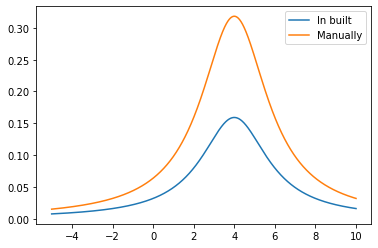

In [6]:
plt.plot(xs, ss.t.pdf(xs, 1, loc=4, scale=2), label='In built');
plt.plot(xs, ss.t.pdf((xs-4)/2, 1, loc=0, scale=1), label='Manually');
plt.legend();

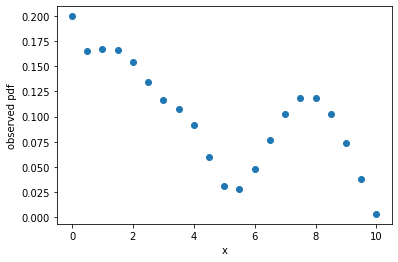

In [7]:
xs = np.arange(0, 10.5, 0.5)
ys = np.array([0.2, 0.165, 0.167, 0.166, 0.154, 0.134, 0.117,
               0.108, 0.092, 0.06, 0.031, 0.028, 0.048, 0.077,
               0.103, 0.119, 0.119, 0.103, 0.074, 0.038, 0.003])

plt.scatter(xs, ys);
plt.xlabel('x');
plt.ylabel('observed pdf');

In [8]:
from scipy.interpolate import interp1d

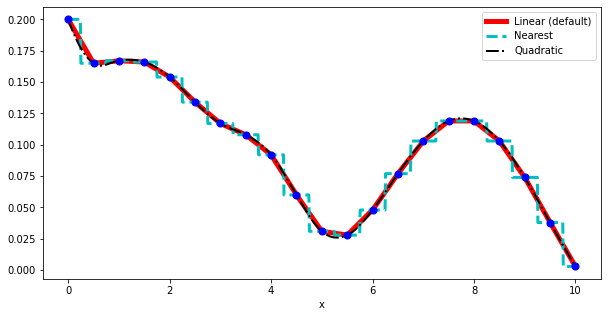

In [9]:
x = np.linspace(min(xs), max(xs), 1000)
y1 = interp1d(xs, ys)(x)
y2 = interp1d(xs, ys, kind='nearest')(x)
y3 = interp1d(xs, ys, kind='quadratic')(x)

# other methods
# cubic, spline

plt.figure(figsize=(10,5))
plt.plot(x, y1, 'r', lw=5, label='Linear (default)', zorder=1);
plt.plot(x, y2, 'c--', lw=3, label='Nearest', zorder=1);
plt.plot(x, y3, 'k', ls='-.', lw=2, label='Quadratic', zorder=1);
plt.scatter(xs, ys, s=50, c='b', zorder=2);
plt.xlabel('x');
plt.legend();

In [10]:
import scipy.integrate as si
# options
# .trapz -> low acc., high speed
# .simps -> med acc., med speed
# .quad  -> high acc., low speed

In [11]:
def get_prob(xs, ys, a, b, resolution=1000):
    if a == b:
        b += 0.0001
    x_norm = np.linspace(min(xs), max(xs), resolution)
    y_norm = interp1d(xs, ys, kind='quadratic')(x_norm)
    normalizer = si.simps(y_norm, x=x_norm)
    x_vals = np.linspace(a, b, resolution)
    y_vals = interp1d(xs, ys, kind='quadratic')(x_vals)
    return si.simps(y_vals, x=x_vals) / normalizer

In [12]:
def get_cdf(xs, ys, v):
    return get_prob(xs, ys, min(xs), v)

In [13]:
def get_sf(xs, ys, v):
    return 1 - get_cdf(xs, ys, v)

In [14]:
print(get_prob(xs, ys, 0, 10))

1.0


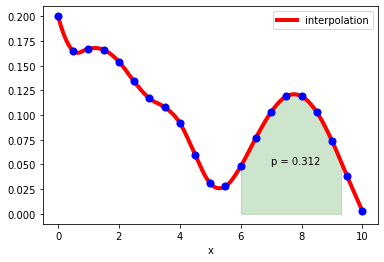

In [15]:
v1, v2 = 6, 9.3
area = get_prob(xs, ys, v1, v2)

plt.plot(x, y3, 'r-', lw=4, label='interpolation', zorder=1);
plt.scatter(xs, ys, s=50, c='b', zorder=2);
plt.fill_between(x, 0, y3, where=(x>=v1)&(x<=v2), color='g', alpha=0.2)
plt.annotate(f'p = {area:.3f}', (7, 0.05));
plt.xlabel('x');
plt.legend();

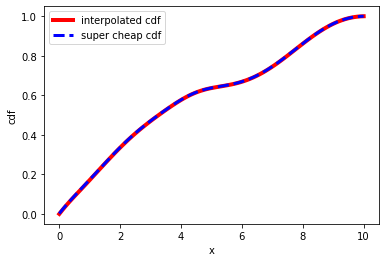

In [16]:
x_new = np.linspace(min(xs), max(xs), 100)
cdf_new = [get_cdf(xs, ys, i) for i in x_new]
cheap_cdf = y3.cumsum() / y3.sum()

plt.plot(x_new, cdf_new, 'r-', lw=4, label='interpolated cdf');
plt.plot(x, cheap_cdf, 'b--', lw=3, label='super cheap cdf');
plt.ylabel('cdf');
plt.xlabel('x');
plt.legend();

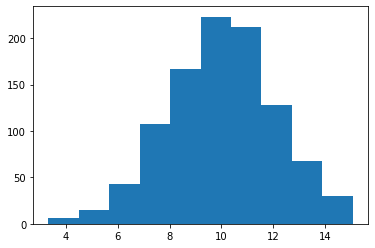

In [17]:
plt.hist(ss.norm.rvs(loc=10, scale=2, size=1000));

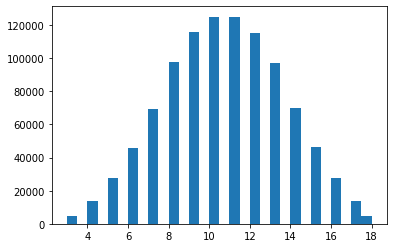

In [18]:
samples = np.ceil(ss.uniform.rvs(loc=0, scale=6, size=(1000000,3))).sum(axis=1)
plt.hist(samples, bins=30);

In [19]:
def pdf(x):
    return np.sin(x**2) + 1

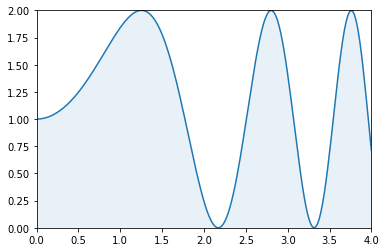

In [20]:
xs = np.linspace(0, 4, 200)
ps = pdf(xs)

plt.plot(xs, ps);
plt.fill_between(xs, 0, ps, alpha=0.1);
plt.xlim(0, 4);
plt.ylim(0, 2);

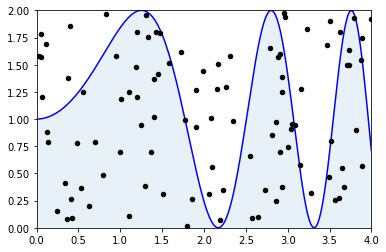

In [21]:
n = 100
rand_x = ss.uniform.rvs(loc=0, scale=4, size=n)
rand_y = ss.uniform.rvs(loc=0, scale=2, size=n)

plt.plot(xs, ps, c='b', zorder=1);
plt.scatter(rand_x, rand_y, c='k', s=20, zorder=2);
plt.fill_between(xs, 0, ps, alpha=0.1);
plt.xlim(0, 4);
plt.ylim(0, 2);

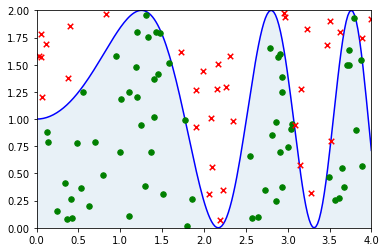

In [22]:
passed = rand_y <= pdf(rand_x)
plt.plot(xs, ps, c='b', zorder=1);
plt.scatter(rand_x[passed], rand_y[passed], c='g', s=30, zorder=2);
plt.scatter(rand_x[~passed], rand_y[~passed], c='r', s=30, zorder=2, marker='x');
plt.fill_between(xs, 0, ps, alpha=0.1);
plt.xlim(0, 4);
plt.ylim(0, 2);

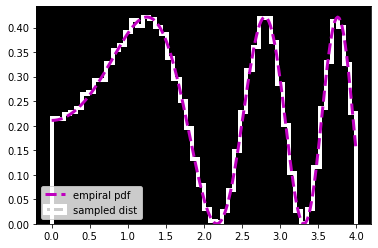

In [23]:
n2 = 100000
x_test = ss.uniform.rvs(scale=4, size=n2)
x_final = x_test[ss.uniform.rvs(scale=2, size=n2) <= pdf(x_test)]

plt.figure()
ax = plt.gca()
ax.set_facecolor('k')
plt.hist(x_final, bins=50, density=True, histtype='step', color='w', lw=4, label='sampled dist', zorder=1);
plt.plot(xs, ps / si.simps(ps, x=xs), c='m', lw=3, ls='--', label='empiral pdf', zorder=2);
plt.legend();

In [24]:
def pdf(x):
    return 3 * x ** 2

def cdf(x):
    return x ** 3

def icdf(cdf):
    return cdf ** (1 / 3)

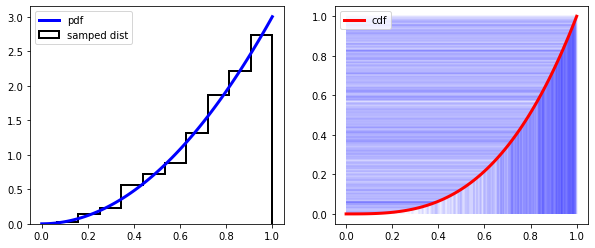

In [25]:
xs = np.linspace(0, 1, 100)
pdfs = pdf(xs)
cdfs = cdf(xs)

n = 2000
u_samps = ss.uniform.rvs(size=n)
x_samps = icdf(u_samps)

fig, axes = plt.subplots(ncols=2, figsize=(10,4))
axes[0].plot(xs, pdfs, color='b', lw=3, label='pdf');
axes[0].hist(x_samps, density=True, histtype='step', label='samped dist', lw=2, color='k');

axes[1].plot(xs, cdfs, color='r', lw=3, label='cdf');
axes[1].hlines(u_samps, 0, x_samps, linewidth=0.1, alpha=0.3, color='b');
axes[1].vlines(x_samps, 0, u_samps, linewidth=0.1, alpha=0.3, color='b');

axes[0].legend(); axes[1].legend();

In [26]:
def pdf(x):
    return np.sin(x**2) + 1

<b>Note</b>: the code below is not "perfect" and can break on some runs

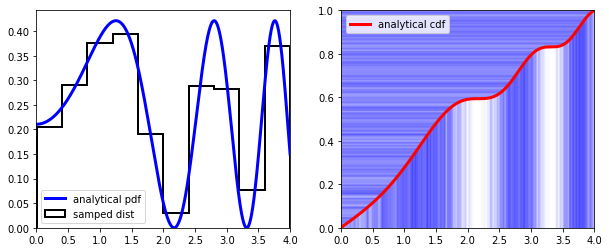

In [27]:
xs = np.linspace(0, 4, 10000)
pdfs = pdf(xs)
cdfs = pdfs.cumsum() / pdfs.sum() # never starts at 0

u_samps = ss.uniform.rvs(size=4000)
x_samps = interp1d(cdfs, xs)(u_samps)

fig, axes = plt.subplots(ncols=2, figsize=(10,4))
axes[0].plot(xs, pdfs/4.747, color='b', lw=3, label='analytical pdf');
axes[0].hist(x_samps, density=True, histtype='step', label='samped dist', lw=2, color='k');

axes[1].plot(xs, cdfs, color='r', lw=3, label='analytical cdf');
axes[1].hlines(u_samps, 0, x_samps, linewidth=0.1, alpha=0.3, color='b');
axes[1].vlines(x_samps, 0, u_samps, linewidth=0.1, alpha=0.3, color='b');

axes[0].legend(); axes[0].set_xlim(0, 4);
axes[1].legend(); axes[1].set_xlim(0, 4); axes[1].set_ylim(0, 1);

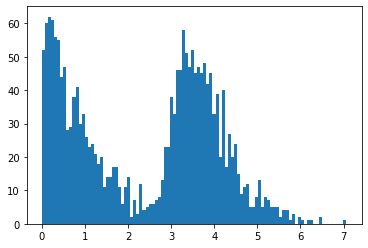

In [28]:
# central limit theorem
# the distribution of sample means approaches a normal distribution
# the width is determined by the number of points used to compute each sample mean
def get_data(n):
    data = np.concatenate((ss.expon.rvs(scale=1, size=n//2), ss.skewnorm.rvs(5, loc=3, size=n//2)))
    np.random.shuffle(data)
    return data

plt.hist(get_data(2000), bins=100);

In [29]:
d10 = get_data(10)
print(d10.mean())

2.5782747283540868


0.08320282554848912


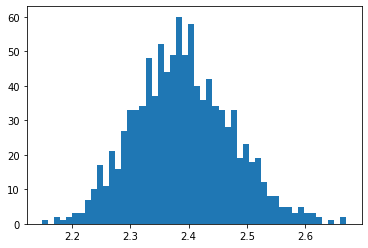

In [30]:
means = [get_data(100).mean() for i in range(1000)]
plt.hist(means, bins=50);
print(np.std(means))

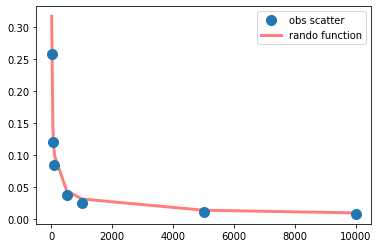

In [31]:
num_samps = [10, 50, 100, 500, 1000, 5000, 10000]
stds = []
for n in num_samps:
    stds.append(np.std([get_data(n).mean() for i in range(1000)]))
    
plt.plot(num_samps, stds, 'o', ms=10, label='obs scatter', zorder=2);
plt.plot(num_samps, 1 / np.sqrt(num_samps), 'r-', lw=3, label='rando function', alpha=0.5, zorder=1);
plt.legend();

In [32]:
n = 1000
data = get_data(n)
sample_mean = np.mean(data)
uncertainty = np.std(data) / np.sqrt(n)
print(f'the mean of the population is {sample_mean:.2f} +/- {uncertainty:.2f}')

the mean of the population is 2.41 +/- 0.05


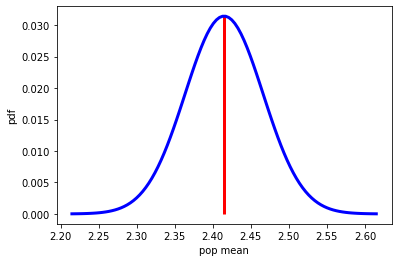

In [33]:
xs = np.linspace(sample_mean - 0.2, sample_mean + 0.2, 100)
ys = ss.norm.pdf(xs, sample_mean, uncertainty)
ys = ys / sum(ys)

plt.plot(xs, ys, 'b-', lw=3);
plt.vlines(sample_mean, 0, max(ys), lw=3, color='r');
plt.xlabel('pop mean');
plt.ylabel('pdf');